In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.nunique()

user_id           2154048
REGION                 14
TENURE                  8
MONTANT              6540
FREQUENCE_RECH        123
REVENUE             38114
ARPU_SEGMENT        16535
FREQUENCE              91
DATA_VOLUME         41550
ON_NET               9884
ORANGE               3167
TIGO                 1315
ZONE1                 612
ZONE2                 486
MRG                     1
REGULARITY             62
TOP_PACK              140
FREQ_TOP_PACK         245
CHURN                   2
dtype: int64

Customers are not repeated, MRG got only one value

In [4]:
#checking for null values
df.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [5]:
#removing columns User_id(Adds no importance, all unique), ZONE1 and ZONE2(very less values present), MRG(contains only one value)
drop_cols = ['user_id', 'ZONE1', 'ZONE2', 'MRG']
df = df.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   REGION          object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   ARPU_SEGMENT    float64
 6   FREQUENCE       float64
 7   DATA_VOLUME     float64
 8   ON_NET          float64
 9   ORANGE          float64
 10  TIGO            float64
 11  REGULARITY      int64  
 12  TOP_PACK        object 
 13  FREQ_TOP_PACK   float64
 14  CHURN           int64  
dtypes: float64(10), int64(2), object(3)
memory usage: 246.5+ MB


In [6]:
#deleting null in region
#df = df[df['REGION'].notna()]

#deleting null rows in MONTANT 
df = df[df["MONTANT"].notna()]
df = df[df["REVENUE"].notna()]
#df = df[df["TOP_PACK"].notna()]
df = df[df["DATA_VOLUME"].notna()]
df = df[df["TIGO"].notna()]
df = df[df["ON_NET"].notna()]
df = df[df["ORANGE"].notna()]


In [7]:
print(len(df))
vc = df.CHURN.value_counts()
print(vc)
print(vc[0]/vc[1],':',vc[1]/vc[1])

536226
0    523442
1     12784
Name: CHURN, dtype: int64
40.94508760951189 : 1.0


So 1 in 40 people are leaving

In [8]:
df.isna().sum()

REGION            89271
TENURE                0
MONTANT               0
FREQUENCE_RECH        0
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
DATA_VOLUME           0
ON_NET                0
ORANGE                0
TIGO                  0
REGULARITY            0
TOP_PACK          13348
FREQ_TOP_PACK     13348
CHURN                 0
dtype: int64

In [9]:
df.head(10)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0
7,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,55,All-net 500F=2000F;5d,8.0,0
11,KAOLACK,K > 24 month,12650.0,27.0,11870.0,3957.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0
18,DAKAR,K > 24 month,7600.0,46.0,7875.0,2625.0,57.0,901.0,10.0,60.0,7.0,62,"Data: 100 F=40MB,24H",27.0,0
19,DAKAR,K > 24 month,21200.0,22.0,22202.0,7401.0,27.0,138609.0,0.0,39.0,1.0,58,"Data:1000F=5GB,7d",21.0,0
23,NaN,K > 24 month,5450.0,14.0,5696.0,1899.0,16.0,32.0,586.0,184.0,30.0,25,Mixt 250F=Unlimited_call24H,9.0,0
24,NaN,K > 24 month,7600.0,16.0,7599.0,2533.0,19.0,1.0,3491.0,9.0,3.0,62,On-net 500F_FNF;3d,9.0,0
25,SAINT-LOUIS,K > 24 month,4800.0,12.0,4201.0,1400.0,15.0,0.0,69.0,22.0,15.0,62,All-net 500F=2000F;5d,4.0,0
26,THIES,K > 24 month,12000.0,4.0,12002.0,4001.0,6.0,1928.0,1158.0,402.0,37.0,62,MIXT: 200mnoff net _unl on net _5Go;30d,2.0,0


Imputing values for three cols with null values --> REGION - 'Others', TOP_PACK - 'No Top Pack', FREQ_TOP_PACK - '0'

In [10]:
#imputing null values with mean values in the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value='Other')
imputer.fit(df.iloc[:,0:1])
df.iloc[:,0:1] = imputer.transform(df.iloc[:,0:1])

#imputing null values in top pack column with 'No top pack' making that as a category in the column
imputer1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Top pack')
imputer1.fit(df.iloc[:, 12:13])
df.iloc[:, 12:13] = imputer1.transform(df.iloc[:, 12:13])

#imputing null values in freq_top_pack column with '0' making that as a value in the column
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer2.fit(df.iloc[:, 13:14])
df.iloc[:, 13:14] = imputer2.transform(df.iloc[:, 13:14])

In [11]:
df.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')


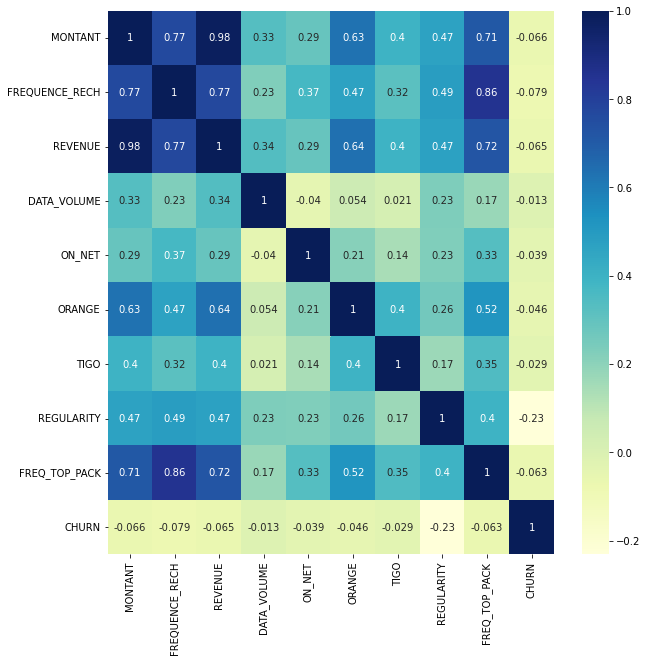

In [12]:
#correlation heatmap to check top features
new_df = df.copy(deep=True)
print(new_df.columns)
new_df = new_df.drop(columns = (['ARPU_SEGMENT', 'FREQUENCE']), axis=1)
corrmat = new_df.corr()
plt.figure(figsize=(10, 10))
top_corr_features = corrmat.index
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")
#data[top_corr_features].corr().to_csv("corrMat.csv")

REVENUE and MONTANT is highly correlated. So removing REVENUE column. This correlation map doesnt include string datatyoe columns. We will use PCA or OLS to filter more features.

In [13]:
df = df.drop(columns = (['REVENUE']))

In [14]:
# encoding categorical variables using get_dummies
cat_variables = ['REGION', 'TENURE', 'TOP_PACK']
df = pd.get_dummies(df, columns=cat_variables, drop_first=True)


drop_first is set to true to avoid multicollinearity problem

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536226 entries, 0 to 2154044
Columns: 138 entries, MONTANT to TOP_PACK_pilot_offer7
dtypes: float64(9), int64(2), uint8(127)
memory usage: 114.0 MB


In [16]:
print(df.columns[0:50])

Index(['MONTANT', 'FREQUENCE_RECH', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN',
       'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK',
       'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM',
       'REGION_Other', 'REGION_SAINT-LOUIS', 'REGION_SEDHIOU',
       'REGION_TAMBACOUNDA', 'REGION_THIES', 'REGION_ZIGUINCHOR',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month',
       'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month', 'TOP_PACK_1500=Unlimited7Day',
       'TOP_PACK_200=Unlimited1Day', 'TOP_PACK_200F=10mnOnNetValid1H',
       'TOP_PACK_305155009', 'TOP_PACK_500=Unlimited3Day',
       'TOP_PACK_APANews_weekly', 'TOP_PACK_All-net 1000=5000;5d',
       'TOP_PACK_All-net 1000F=(3000F On+3000F Off);5d',
       'TOP_PACK_All-net 300=600;2d',
       'TOP_PACK_All-net 5000= 20000off+20000on;30d',


In [17]:
df.head()

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,...,TOP_PACK_Twter_U2opia_Daily,TOP_PACK_Twter_U2opia_Monthly,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_VAS(IVR_Radio_Weekly),"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer7
0,4250.0,15.0,1417.0,17.0,4.0,388.0,46.0,1.0,54,8.0,...,0,0,0,0,0,0,0,0,0,0
3,13500.0,15.0,4501.0,18.0,43804.0,41.0,102.0,2.0,62,11.0,...,0,0,0,0,0,0,0,0,0,0
7,7000.0,16.0,2410.0,22.0,1601.0,77.0,29.0,100.0,55,8.0,...,0,0,0,0,0,0,0,0,0,0
11,12650.0,27.0,3957.0,36.0,8453.0,431.0,66.0,6.0,62,11.0,...,0,0,0,0,0,0,0,0,0,0
18,7600.0,46.0,2625.0,57.0,901.0,10.0,60.0,7.0,62,27.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:, :10] = sc.fit_transform(df.iloc[:, :10])

In [19]:
df.head()

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,...,TOP_PACK_Twter_U2opia_Daily,TOP_PACK_Twter_U2opia_Monthly,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_VAS(IVR_Radio_Weekly),"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer7
0,-0.493753,-0.140539,-0.506027,-0.232363,-0.463105,-0.025407,-0.356589,-0.356781,0.410521,-0.295613,...,0,0,0,0,0,0,0,0,0,0
3,0.634754,-0.140539,0.601423,-0.172071,4.247278,-0.345854,-0.134114,-0.342171,0.926482,-0.082667,...,0,0,0,0,0,0,0,0,0,0
7,-0.158251,-0.075638,-0.149445,0.069095,-0.291358,-0.312609,-0.424126,1.089633,0.475016,-0.295613,...,0,0,0,0,0,0,0,0,0,0
11,0.531053,0.638269,0.406075,0.913176,0.445526,0.014303,-0.277134,-0.283730,0.926482,-0.082667,...,0,0,0,0,0,0,0,0,0,0
18,-0.085051,1.871382,-0.072240,2.179299,-0.366638,-0.374482,-0.300970,-0.269120,0.926482,1.053046,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv("Complete_Data_BDT.csv")

In [20]:
#splitting X and Y sets and the test train data
y = df.CHURN
x = df.drop(columns=['CHURN'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [22]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
#columns = X_train.columns
os_data_x,os_data_y=os.fit_resample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_x, )
y_train = pd.DataFrame(data=os_data_y,columns=['CHURN'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train))
print("Number of no subscription in oversampled data",len(y_train[y_train['CHURN']==0]))
print("Number of subscription",len(y_train[y_train['CHURN']==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_train[y_train['CHURN']==0])/len(X_train))
print("Proportion of subscription data in oversampled data is ",len(y_train[y_train['CHURN']==1])/len(X_train))

length of oversampled data is  837618
Number of no subscription in oversampled data 418809
Number of subscription 418809
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


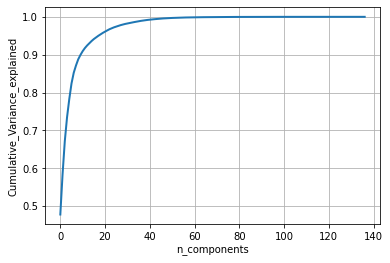

In [23]:
from sklearn.decomposition import PCA
pca=PCA()  
pca.n_components=len(X_train.columns)
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [24]:
pca=PCA()  
pca.n_components=len(X_train.columns)
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('n_components= %d,   variance=%f\n' %(index,np.round(var,3)))

n_components= 0,   variance=47.800000

n_components= 1,   variance=58.420000

n_components= 2,   variance=67.180000

n_components= 3,   variance=73.470000

n_components= 4,   variance=78.290000

n_components= 5,   variance=82.410000

n_components= 6,   variance=85.250000

n_components= 7,   variance=87.160000

n_components= 8,   variance=88.790000

n_components= 9,   variance=89.950000

n_components= 10,   variance=90.950000

n_components= 11,   variance=91.770000

n_components= 12,   variance=92.450000

n_components= 13,   variance=93.060000

n_components= 14,   variance=93.630000

n_components= 15,   variance=94.140000

n_components= 16,   variance=94.580000

n_components= 17,   variance=95.000000

n_components= 18,   variance=95.390000

n_components= 19,   variance=95.770000

n_components= 20,   variance=96.110000

n_components= 21,   variance=96.430000

n_components= 22,   variance=96.740000

n_components= 23,   variance=96.990000

n_components= 24,   variance=97.230000

n_componen

### **Uptil this point all data cleaning is done. The data will be read from csv file using spark to fit the model and see. 